Author: Andrii Vandzhura

# Installing libraries
Before we start solving the tasks we need to make sure that we install all necessary libraries.
The libraries that we will use include:


*   pandas
*   numpy
* statsmodels
* matplotlib
* seaborn
* plotly
* scipy
* wooldridge



In [67]:
!pip install pandas numpy statsmodels matplotlib seaborn plotly scipy wooldridge
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import wooldridge

import plotly.express as px
from scipy.stats import t as t_dist
from scipy.stats import f as f_dist
from scipy.stats import norm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Now that we have installed the libraries we can start working on the tasks

# Exploratory data analysis (EDA)
First things first, we need to, basically, get our data and perform some exploratory data analysis in order to see if our data has some flows such as, for example, NA values in some of the entries and, well, deal with them.
Therefore, let's write the code snippet that will get our "wage2" data from the wooldridge package and tell us more about our data:

In [68]:
dataframe = wooldridge.data("wage2")
dataframe.head()

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0,6.645091
1,808,50,119,41,18,11,16,37,1,0,0,1,1,NaN,14.0,14.0,6.694562
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0,6.715384
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0,6.476973
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0,6.331502


In [69]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wage     935 non-null    int64  
 1   hours    935 non-null    int64  
 2   IQ       935 non-null    int64  
 3   KWW      935 non-null    int64  
 4   educ     935 non-null    int64  
 5   exper    935 non-null    int64  
 6   tenure   935 non-null    int64  
 7   age      935 non-null    int64  
 8   married  935 non-null    int64  
 9   black    935 non-null    int64  
 10  south    935 non-null    int64  
 11  urban    935 non-null    int64  
 12  sibs     935 non-null    int64  
 13  brthord  852 non-null    float64
 14  meduc    857 non-null    float64
 15  feduc    741 non-null    float64
 16  lwage    935 non-null    float64
dtypes: float64(4), int64(13)
memory usage: 124.3 KB


As we may already see at this point there some NA entries in the brthord, meduc and feduc. So we will deal with that in a moment, but let's first get a little more insights on our data.

In [70]:
dataframe.nunique()

wage       449
hours       37
IQ          80
KWW         42
educ        10
exper       22
tenure      23
age         11
married      2
black        2
south        2
urban        2
sibs        15
brthord     10
meduc       19
feduc       18
lwage      449
dtype: int64

In [71]:
dataframe.describe()

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,852.000000,857.000000,741.000000,935.000000
mean,957.945455,43.929412,101.282353,35.744385,13.468449,11.563636,7.234225,33.080214,0.893048,0.128342,0.341176,0.717647,2.941176,2.276995,10.682614,10.217274,6.779004
std,404.360822,7.224256,15.052636,7.638788,2.196654,4.374586,5.075206,3.107803,0.309217,0.334650,0.474358,0.450385,2.306254,1.595613,2.849756,3.300700,0.421144
min,115.000000,20.000000,50.000000,12.000000,9.000000,1.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.744932
25%,669.000000,40.000000,92.000000,31.000000,12.000000,8.000000,3.000000,30.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.000000,8.000000,6.505783
50%,905.000000,40.000000,102.000000,37.000000,12.000000,11.000000,7.000000,33.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2.000000,12.000000,10.000000,6.807935
75%,1160.000000,48.000000,112.000000,41.000000,16.000000,15.000000,11.000000,36.000000,1.000000,0.000000,1.000000,1.000000,4.000000,3.000000,12.000000,12.000000,7.056175
max,3078.000000,80.000000,145.000000,56.000000,18.000000,23.000000,22.000000,38.000000,1.000000,1.000000,1.000000,1.000000,14.000000,10.000000,18.000000,18.000000,8.032035


So let's move on to the dealing with NA values in the dataframe. There are number of ways how we can act in this situation:
* we can drop rows with missing data in dataframe
* we can fill missing values with mean or median
* we can use interpolation to fill missing values

First of all, it worth mentioning that removing rows with NA entries would be incorrect, because, for instance, if we drop only rows with NA father education, we will lose approximately 20,74% of data:

$$
935-741=194 \\
194÷935×100≈20,74\%
$$

Therefore, since dropping data is not a good solution, we can consider applying the mean/median approach. But while this approach works well in case of the feduc and meduc, the complexities of doing so arise when we are trying to deal with the birthord, because, as we can see on the following diagrams, it a little bit modifies the form of our distribution, while interpolation preserves the form of distribution.

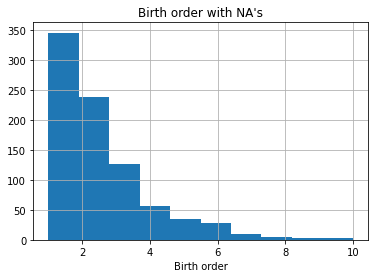

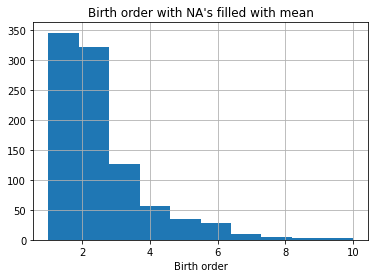

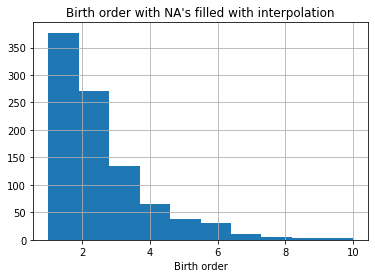

In [72]:
# Showing the row "brthord" data
birth_order = dataframe["brthord"]
birth_order.hist()
plt.xlabel("Birth order")
plt.title("Birth order with NA's")
plt.show()

# Replacing NA's in "brthord" with mean
birth_order_mean = dataframe["brthord"].fillna(dataframe["brthord"].mean())
birth_order_mean.hist()
plt.xlabel("Birth order")
plt.title("Birth order with NA's filled with mean")
plt.show()

# Interpolating the missing values in the whole data
dataframe.interpolate(method="linear", limit_direction="forward", limit_area=None, inplace=True)
dataframe["brthord"].hist()
plt.xlabel("Birth order")
plt.title("Birth order with NA's filled with interpolation")
plt.show()

# Task 1
After filling the missing data in the dataset, we can start working on the provided tasks.

## Task 1.a
### Problem setting
For the variable wage compute the common location measures: mean, median, upper and lower quartiles, the upper and lower 5%-quantiles. Give an economic interpretation for every location measure.

### Solution
Let's compute the location measures:


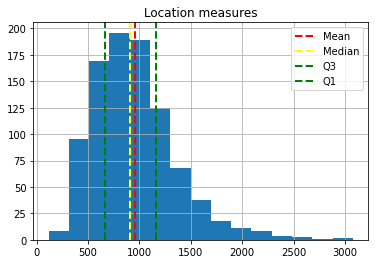

In [73]:
wage = dataframe["wage"]

# Location measures
def location_measures(wage):
  wage_mean = wage.mean()
  wage_median = wage.median()
  wage_Q3 = wage.quantile(0.75)
  wage_Q1 = wage.quantile(0.25)
  wage_upper_quantile = wage.quantile(0.95)
  wage_lower_quantile = wage.quantile(0.05)

  location_measures = pd.Series([wage_mean, wage_median, wage_Q3, wage_Q1, wage_upper_quantile, wage_lower_quantile])
  location_measures.index = ["Mean", "Median", "Wage upper quartile (Q3)", "Wage lower quartile (Q1)", "Wage upper quantile", "Wage lower quantile"]
  return location_measures

location_measures = location_measures(wage)
wage_mean, wage_median, wage_Q3, wage_Q1, wage_upper_quantile, wage_lower_quantile = location_measures

wage.hist(bins=15)
plt.axvline(wage_mean, color='red', linestyle='dashed', linewidth=2)
plt.axvline(wage_median, color='yellow', linestyle='dashed', linewidth=2)
plt.axvline(wage_Q3, color='green', linestyle='dashed', linewidth=2)
plt.axvline(wage_Q1, color='green', linestyle='dashed', linewidth=2)

plt.legend(['Mean', 'Median', 'Q3', 'Q1'])
plt.title('Location measures')
plt.show()

As it is expected our data is right-skewed, which is rather logical, because most population earn, so to say, the "average wages", while there are also people who have huge companies, which, obviously, results in higher wages.

Taking this discussion even further we can even state that the histogram we got reflects the distribution of wages of the social classes, where obviously most of the population is the part of the middle-class (roughly speaking between the first and third quartile of our histogram), while there are not so many people in lower and upper classes.

## Task 1.b
### Problem setting
Compute the corresponding measures of variation for wage: range, interquartile range, variance. Comment on the results. Check whether 3 − sigma rule holds true.

### Solution
Again, let's code this task and give the demanded explanations afterwards

Minimal                   115.000000
Maximal                  3078.000000
Range                    2963.000000
Interquartile range       491.000000
Variance               163507.674752
Standard deviation        404.360822
dtype: float64 

For sigma 1 the percentage of covered data is 71.76%
For sigma 2 the percentage of covered data is 96.04%
For sigma 3 the percentage of covered data is 98.93%


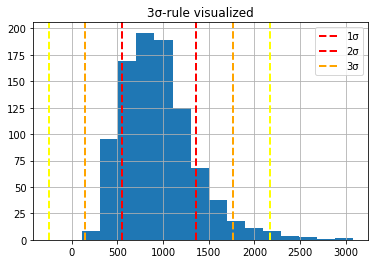

In [74]:
# Variation measures
def variation_measures(wage):
  wage_min = wage.min()
  wage_max = wage.max()
  wage_range = wage_max - wage_min
  wage_IQR = wage_Q3 - wage_Q1
  wage_variance = wage.var()
  wage_stand_dev = wage.std()

  variation_measures = pd.Series([wage_min, wage_max, wage_range, wage_IQR, wage_variance, wage_stand_dev])
  variation_measures.index = ["Minimal", "Maximal", "Range", "Interquartile range", "Variance", "Standard deviation"]
  return variation_measures

variation_measures = variation_measures(wage)
wage_min, wage_max, wage_range, wage_IQR, wage_variance, wage_stand_dev = variation_measures
print(variation_measures, "\n")

# Checking 3-sigma rule
wage.hist(bins=15)

sigmas = [1, 2, 3]
colors = ["red", "orange", "yellow"]
for i in range(len(sigmas)):
  positive_sigma = wage_mean + sigmas[i] * wage_stand_dev
  negative_sigma = wage_mean - sigmas[i] * wage_stand_dev

  plt.axvline(positive_sigma, color=colors[i], linestyle='dashed', linewidth=2)
  plt.axvline(negative_sigma, color=colors[i], linestyle='dashed', linewidth=2)
  
  condition = (dataframe["wage"] < positive_sigma) & (dataframe["wage"] > negative_sigma)
  selected = dataframe[condition]
  percentage = round(len(selected) / len(dataframe) * 100, 2)
  print(f"For sigma {sigmas[i]} the percentage of covered data is {percentage}%")


plt.legend(['1σ', '2σ', '3σ'])
plt.title('3σ-rule visualized')
plt.show()



Let's have a brief comment on each of the variation measures:
* Range basically tells us the gap between the maximal and minimal value of wage, which is good for understanding how far are the extreme values of population wages located. In other words, we by calculating the range we may see the difference between the maximal and minimal wage value observation in our sample
* Interquartile range tells us the gap between the 3-rd and 1-st quartiles of the data and it might be usefult in case that we want to spot the outliers that our sample has. We will discuss the outliers more exhaustively while making the boxplot for our data
* Standard deviation (square root of variance) is basically the tool to understand how much on average our observation's wage declines from the mean. It is also very useful in proving the 3σ-rule, which is covered next in our report

Now, the 3σ-rule basically tell us that:
* percentage of data located between -1σ and 1σ is ~68%
* percentage of data located between -2σ and 2σ is ~95%
* percentage of data located between -3σ and 3σ is ~99.7%

As we may see from the results of our analysis it actually aproximately holds true, because we have ~72%, 96% and 99% of data distributed between 1σ, 2σ and 3σ accordingly

## Task 1.c
### Problem Setting
Plot the histogram of wage and the Box-plot. Compute skewness of the data and make the conclusion whether the distribution of this variable is symmetric.

### Solution



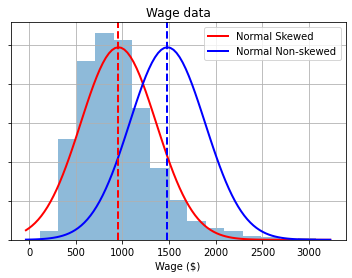

Skewness    1.201187
dtype: float64

In [75]:
# Make histogram with skewed and non-skewed data
wage.hist(bins=15, density=True, alpha=0.5)
plt.xlabel("Wage ($)")
plt.title("Wage data")

non_skwd_wage_mean = (wage_max - wage_min)/2

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p1 = norm.pdf(x, wage_mean, wage_stand_dev)
p2 = norm.pdf(x, non_skwd_wage_mean, wage_stand_dev)

plt.plot(x, p1, color="red", linewidth=2, label='Normal Skewed')
plt.plot(x, p2, color="blue", linewidth=2, label='Normal Non-skewed')

plt.axvline(wage_mean, color='red', linestyle='dashed', linewidth=2)
plt.axvline(non_skwd_wage_mean, color='blue', linestyle='dashed', linewidth=2)

plt.gca().set_yticklabels([])
plt.legend(['Normal Skewed', 'Normal Non-skewed'])
plt.show()

# Make boxplot
fig = px.box(wage, y="wage", points="all")
fig.update_layout(
    height=500,
    width=800
)
fig.show()

# Calculate skewness
wage_skew = wage.skew()
skewness = pd.Series([wage_skew])
skewness.index = ["Skewness"]
skewness

We have already established that visually our data is right(positively)-skewed, now we have this proved with the skewness statistic, which is ~1.2011. This also means that our data is not symmetric. You can compare our data distribution colored red and the non-skewed symmetric distribution on the histogram above.

Now concerning the boxplot. As we may see above, there are a couple of outliers lying beside the boxplot. Essentially those outliers are making our data-distribution right-skewed and will negatively influence the model prediction abilities.

But before we remove those outliers from the dataset, let's complete task 1.d in oreder to get useful insights about applying logarithm to our data.

## Task 1.d
### Problem Setting
Consider the natural logarithm of the wage . Plot the histogram for log(wage) and compare it with the histogram for original data. Compute the skewness of log(wage) and make the corresponding conclusions.

### Solution
Instead of computing the log-wage we will use the lwage column in our dataset with already computed log values of wage

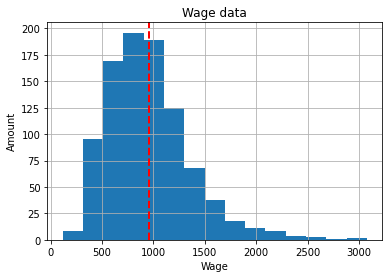

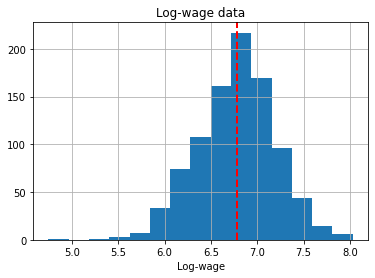

Skewness    1.201187
dtype: float64
Log-wage skewness   -0.271149
dtype: float64


In [76]:
log_wage = dataframe["lwage"]
log_wage_skew = log_wage.skew()
log_wage_skewness = pd.Series([log_wage_skew])
log_wage_skewness.index = ["Log-wage skewness"]

wage.hist(bins=15)
plt.axvline(wage_mean, color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Wage")
plt.ylabel("Amount")
plt.title("Wage data")
plt.show()

log_wage.hist(bins=15)
plt.axvline(log_wage.mean(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Log-wage")
plt.title("Log-wage data")
plt.show()

print(skewness)
print(log_wage_skewness)

Obviously, as we can see, logarithming the data, makes it more symmetrically distributed which can be implied both by histograms and skewness statistic (log-wage skewness is quite close to 0, which means that distribution is nearly symmetrical)

## Removing outliers

Now, since we collected all necessary insights about our data, we can clean it from the outliers for our future linear regression model to perform better estimations.

Actually we have chosen to do this, because we found out that by removing the outliers we lose only 3% of our data, which is quite a fair trade for model accuracy

We are losing 0% of data


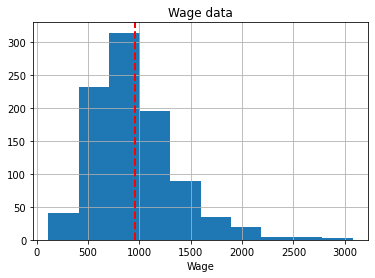

In [77]:
upper = wage_Q3 + 1.5 * wage_IQR
lower = wage_Q1 - 1.5 * wage_IQR

old_size = len(dataframe)
cleaned = dataframe[dataframe["wage"] < upper]
cleaned = cleaned[cleaned["wage"] > lower]
new_size = len(dataframe)

loss = round((1 - new_size / old_size)*100)
print(f"We are losing {loss}% of data")

dataframe["wage"].hist()
plt.axvline(dataframe["wage"].mean(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Wage")
plt.title("Wage data")
plt.show()

## Task 1.e
### Problem Setting
Plot the scatter plots of wage vs. hours, IQ, KWW , educ, exper, tenure, age. Compute the corresponding correlation coefficients and interpret the results.

### Solution

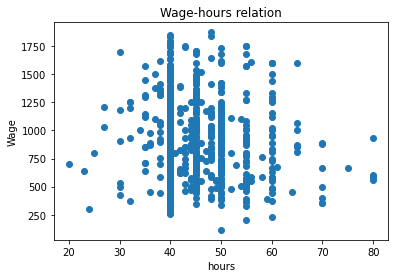

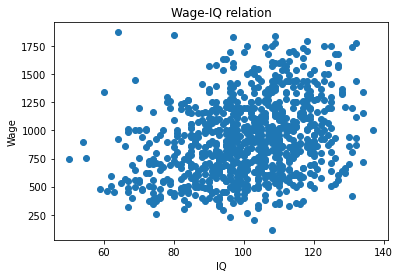

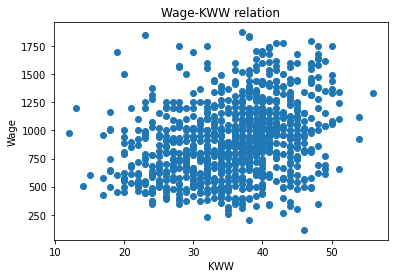

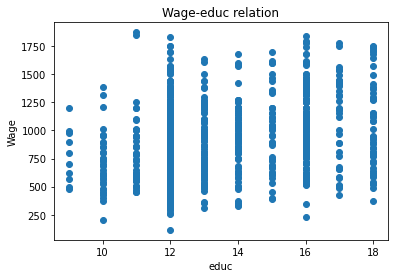

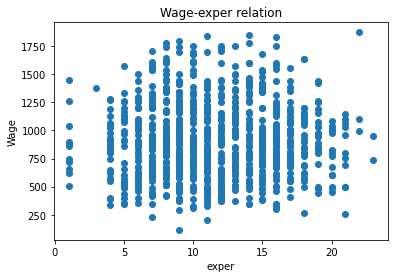

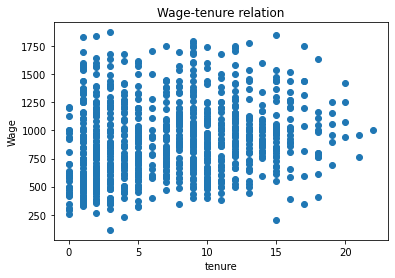

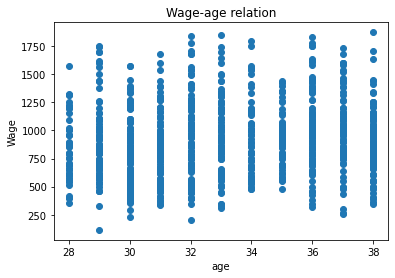

,wage,hours,IQ,KWW,educ,exper,tenure,age
wage,1.000000,-0.068500,0.300248,0.288475,0.289692,0.022407,0.187539,0.125643
hours,-0.068500,1.000000,0.072977,0.103252,0.091152,-0.066667,-0.051826,0.015590
IQ,0.300248,0.072977,1.000000,0.404981,0.505481,-0.227967,0.042238,-0.059960
KWW,0.288475,0.103252,0.404981,1.000000,0.360694,0.022999,0.145589,0.373322
educ,0.289692,0.091152,0.505481,0.360694,1.000000,-0.465672,-0.039967,-0.045605
exper,0.022407,-0.066667,-0.227967,0.022999,-0.465672,1.000000,0.241755,0.509449
tenure,0.187539,-0.051826,0.042238,0.145589,-0.039967,0.241755,1.000000,0.274386
age,0.125643,0.015590,-0.059960,0.373322,-0.045605,0.509449,0.274386,1.000000


In [78]:
wage = cleaned["wage"]  # update 'wage'
keys = ["hours", "IQ", "KWW", "educ", "exper", "tenure", "age"]

for key in keys:
    comparison_data = cleaned[key]
    plt.scatter(comparison_data, wage)
    plt.ylabel("Wage")
    plt.xlabel(key)
    plt.title(f"Wage-{key} relation")
    plt.show()

keys.insert(0, "wage")
corr_coeff = cleaned[keys].corr()
corr_coeff.style.background_gradient(cmap='coolwarm')


We get a very convenient symmetric correlation matrix, where we can see the correlation between the model independent and dependent variables. The closer the absolute value of coefficient to the 1, the stronger is the correlation between the values.

Correlation doesn't necessarily imply the causation, however it is the great tool to estimate the extent to which two values fluctuate in relation to each other. For example, we can consider the correlation between the education and the wage. We can see that comparing with the other variables education by way more related, than, for instance, wage and hours.

Probably, we can also use correlation of dependent variables to estimate whether the values are jointly significant. In other words, we can assume, that the higher is the correlation between two independent variables, the more likely they are to be jointly significant. But, honestly speaking, cannot state this for sure

# Task 2

## Task 2.a
### Problem Setting
Construct linear regression model for wage taking other variables as independent variables.

### Solution
We will use the statsmodels.formula.api in oreder to perform OLS and, thus, construct linear regression model.

Our model will look like:
$$
\text{wage} = β_0 + β_1\text{hours + } β_2\text{IQ + }β_3\text{KWW + }β_4\text{educ + }β_5\text{exper + }β_6\text{tenure + }β_7\text{age + }
β_8\text{married + }\\
β_9\text{black + }β_{10}\text{south + }β_{11}\text{urban + }β_{12}\text{sibs + }β_{13}\text{brthord + }β_{14}\text{meduc + }β_{15}\text{feduc} \\
$$

***Note!***

We did not include the lwage (logarithmed wage) into the model by default, because logarithm is the function of the wage and doing so will produce perfect collinearity, which will spoil our model and make it hard to exclude lwage from the model.

In [79]:
model_all = smf.ols(
  formula="wage ~ hours + IQ + KWW + educ + exper + tenure + age + married + black + south + urban + sibs + brthord + meduc + feduc",
  data=cleaned
).fit()

print(model_all.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     22.06
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           1.56e-51
Time:                        19:58:39   Log-Likelihood:                -6409.6
No. Observations:                 906   AIC:                         1.285e+04
Df Residuals:                     890   BIC:                         1.293e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -180.2349    158.313     -1.138      0.2

## Task 2.b
### Problem Setting
For independent variable educ write down the corresponding hypothesis of the t-test. Interpret in your own words what this hypothesis means.

### Solution
Let's formulate hypothesis for the education slope parameter $β_4$

$$
H_0:\beta_4=0 \\
H_1:\beta_4\ne0
$$

Basically, we want to estimate whether the independent variable "education" is statistically significant in our linear model.

Since it is not asked in the task to test this hypothesis, we won't perform the corresponding t-test, however one can look-up p-value for this test in the resulting summary table from the task 2.a.

## Task 2.c
### Problem Setting
Construct the test for the sign of coefficients for some of independent variable. State your intuitive expectation. Formulate the hypotheses. Test them. Interpret the result.

### Solution
We could have chosen separate dependent variables and construct the sign t-test for them, but at the end of the day, we can simply write the fuction that will perform the test for the whole set of variables.

First of all, let's discuss the theory behind the t-test, the notions that we will use to built t-test procedure. We will certainly use the t-statistic, the formula for which is

$$
\text{t-statistic} = \frac{β_i}{\text{se}_i}\text{, where} \\
β_i\text{ - slope parameter for }x_i \\
\text{se}_i \text{ - standard error for }x_i \\
$$

For testing whether slope parameter has positive sign, we construct the following hypothesis:

$$
H_0: β = 0 \\
H_1: β > 0 \\
$$

Then we calculate the p-value using following notions:

$$
\text{p-value}=1-F(\text{t-statistic, degrees of freedom})\text{, where} \\
F(\text{t-statistic, degrees of freedom}) \text{ - c.d.f. of t-distribution} \\
$$

Similar procedure for slope parameter negative sign test:

$$
H_0: β = 0 \\
H_1: β < 0 \\
\text{p-value}=F(\text{t-statistic, degrees of freedom})\\
$$


Armed with necessary statistics theory, let's construct the function:

In [80]:
def t_test(model, alter_hypoth):
  coefficients = model.params
  standard_errors = model.bse

  t_statistics = coefficients / standard_errors
  df = model.df_resid - 1
  p_values = None

  if alter_hypoth == "β > 0":
    p_values = t_statistics.apply(lambda x : round(1 - t_dist.cdf(x, df), 6))
    p_values.name = "p-value (H0: β = 0; H1: β > 0)"
  
  elif alter_hypoth == "β < 0":
    p_values = t_statistics.apply(lambda x: round(t_dist.cdf(x, df), 6))
    p_values.name = "p-value (H0: β = 0; H1: β < 0)"

  return p_values

p_values = t_test(model_all, "β > 0")
print(p_values, "\n")
p_values = t_test(model_all, "β < 0")
print(p_values)

Intercept    0.872384
hours        0.999965
IQ           0.002051
KWW          0.027869
educ         0.000000
exper        0.000636
tenure       0.000007
age          0.432047
married      0.000003
black        0.998857
south        0.988866
urban        0.000000
sibs         0.154588
brthord      0.882589
meduc        0.043093
feduc        0.180613
Name: p-value (H0: β = 0; H1: β > 0), dtype: float64 

Intercept    0.127616
hours        0.000035
IQ           0.997949
KWW          0.972131
educ         1.000000
exper        0.999364
tenure       0.999993
age          0.567953
married      0.999997
black        0.001143
south        0.011134
urban        1.000000
sibs         0.845412
brthord      0.117411
meduc        0.956907
feduc        0.819387
Name: p-value (H0: β = 0; H1: β < 0), dtype: float64


Now that we have a very convenient tool for testing signs of linear model parameters, we can comment on the p-value of each parameter.

During the analysis, if $\text{p-value}<0.05$ then we reject $H_0$, which in our case, with test performed above, means that sign of $β_i$ is positive


* intercept - obviously positive because wages cannot be negative.
* hours - tend to be counter-intuitive to influnce the wage negatively. But after thinking about it: it's not hours of work that determine your wage, but rather the workplace. Furthermore, poor people tend to search for a couple of jobs to earn more.
* IQ - seems that IQ positively influence wage, but myself thought that it doesn't really.
* KWW - quite expected, because the higher knowledge of world work score is, the more you know about the possible job opportunities.
* educ - also obvious that education contributes positively to the wages of the person, because educated person has more hard- and soft- skills to meet the high-paid job requirements.
* exper - same intuition as with educ example.
* tenure - first thought that tenure wouldn't positively influnce the wages, because you can always change the workplace for a better paying job. But then, if thought about more, the more years you are with the one employer, the more stable you career grow is and possibly the higher occupation in the copmany you have.
* age - obviously age doesn't matter if talking about the wage of person
* married - it is not necessarily that marrige possibly influence the wage, it is more correct to state that people tend to marry, when they have a wage, which would be enough to sustain the family.
* black - the reason that the black color of skin negatively influence the wage may be the discrimination and prejudice towards the people with black skin-color.
* south - probably the reason living in the south of USA influences the wage is that historically, the north of USA was more technologically developed, that's why there were a better paying jobs
* urban - job proposals in city tend to bring more wage
* sibs, brthord, meduc, feduc - should be tested for joint significance, because it seems that they all (except mother education) are statistically insignificant (both alternative hypotheses \$H1: β_i > 0\$ and \$H1: β_i < 0\$ fail)

## Task 2.d

### Problem Setting
Interpret the coefficient of variable married. Explain why we do not include into the model variable unmarried (=1 if is not married).

### Solution
Coefficient near the variable married $β_8\approx141$. If the person is married, the expected increasement in wage is by $141, under ceteris paribus (holding all other factors fixed). In our case being married is associated with a higher wage.

We don't include the "unmarried" variable into the model, because it will produce perfect collinearity and violate the third classical linear model assumption

## Task 2.e

### Problem Setting
Test variables sibs, brthord, meduc, feduc for joint significance. What test to use?

### Solution
We need to use the F-test in order to test for the group significance. For now we are asked to test the hypothesis that:

$$
H_0:β_{12}=β_{13}=β_{14}=β_{15}=0 \\
H_1:β_i\ne0\text{, where } i \in \{12, ..., 15\} \\
β_{12}\text{ - sibs slope parameter} \\
β_{13}\text{ - brthord slope parameter} \\
β_{14}\text{ - meduc slope parameter} \\
β_{15}\text{ - feduc slope parameter} \\
$$

Our null hypothesis is that coefficients sibs, brthord, meduc and feduc are all equal to zero, therefore, are jointly insignificant for our model, while the alternative hypothesis states that at least one of our variables is not equal to zero, thus, making those four parameters jointly significant for linear model.

Our f-test is performed the following way. First we search for the f-statistic in our sample, which is equal to the following:

$$
\text{f-statistic} = \frac{(\text{SSR}_\text{ur} - \text{SSR}_\text{r})/q}{\text{SSR}_\text{ur}/(n-k-1)}\text{, where} \\
\text{SSR}_\text{r} \text{ - the sum of squared residuals from the restricted model} \\
\text{SSR}_\text{ur} \text{ - the sum of squared residuals from the unrestricted model} \\
q \text{ - degrees of freedom of restricted model minus degrees of freedom of unrestricted model} \\
n \text{ - sample size} \\
k \text{ - number of features} \\
$$

Afterwards, we can obtain the p-value for our test:

$$
\text{p-value}=1 - F(\text{f-statistic}, q, \text{df}_\text{ur})\text{, where} \\
F \text{ - is the c.d.f. of f-distribution with calculated f-statistic,}\\ 
\text{degrees of freedom minus degrees of freedom of unrestricted model,} \\ 
\text{degrees of freedom of unrestricted model}
$$

In [81]:
hypotheses = "(sibs = 0), (brthord = 0), (meduc = 0), (feduc = 0)"
f_test = model_all.f_test(hypotheses)

f_test

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=1.9988794543315187, p=0.09272970341037642, df_denom=890, df_num=4>

The resulting p-value is bigger, then 0.05, that's why we cannot reject the null hypothesis that variables sibs, brthord, meduc and feduc are insignificant for the model 

## Task 2.f
### Problem Setting
Select variables for the model. Explain how to do this.

### Solution
We will be selecting the variables for the model by removing one-by-one the one's with the largest p-value that is bigger than 0.05, till our adjusted $R^2$ will stop growing.

First of all, we will begin removing our varaibles from the age, since it has the largest p-value, which is bigger than 0.05 which can be seen in the table in task 2.a and which proves our previous intuition that age shouldn't influence the wage. So the model we get after removing the age will be as follows:

$$
\text{wage} = β_0 + β_1\text{hours + } β_2\text{IQ + }β_3\text{KWW + }β_4\text{educ + }β_5\text{exper + }β_6\text{tenure + }
β_7\text{married + }\\
β_8\text{black + }β_{9}\text{south + }β_{10}\text{urban + }β_{11}\text{sibs + }β_{12}\text{brthord + }β_{13}\text{meduc + }β_{14}\text{feduc} \\
$$

In [82]:
model = smf.ols(formula="wage ~ hours + IQ + KWW + educ + exper + tenure + married + black + south + urban + sibs + brthord + meduc + feduc",
    data=cleaned
).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     23.66
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           3.18e-52
Time:                        19:58:39   Log-Likelihood:                -6409.6
No. Observations:                 906   AIC:                         1.285e+04
Df Residuals:                     891   BIC:                         1.292e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -163.8617    126.098     -1.299      0.1

After removing one-by-one all the independent variables from the model, taking the ones with the biggest p-value and checking whether $\text{p-value} > 0.05$, we get the following model:

$$
\text{wage} = β_0 + β_1\text{hours + } β_2\text{IQ + }β_3\text{KWW + }β_4\text{educ + }β_5\text{exper + }β_6\text{tenure + }\\
β_7\text{married + }β_8\text{black + }β_{9}\text{south + }β_{10}\text{urban + }β_{11}\text{meduc} \\
$$

In [83]:
model = smf.ols(formula="wage ~ hours + IQ + KWW + educ + exper + tenure + married + black + south + urban + meduc",
    data=cleaned
).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     29.91
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           6.78e-54
Time:                        19:58:39   Log-Likelihood:                -6410.9
No. Observations:                 906   AIC:                         1.285e+04
Df Residuals:                     894   BIC:                         1.290e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -159.9601    119.610     -1.337      0.1

Since p-value of other variables are less than the 0.05 we will stop excluding another variables from the model, because it won't improve its accuracy.

Now let's interpret the model that we got:

1. $β_0$ is the intercept of our linear regression model
2. Since our model is level-level, each coefficient $β_i : i \in \{1, ..., 10\}$ singnifies the increase in the average wage by $β_i$ with the increase of the correspondent variable by one unit, holding others factors fixed (ceteris paribus)
$$
Δy = β_iΔx
$$
3. Our model is built in the way that the p-value for each $\beta_i$ slope coefficient is less than 0.05, which assumes that there is a strong relation between the independent variables $x_i$ and the dependent variable $y\text{ (wage)}$
4. Our adjusted $R^2$ is equal to $0.26$. Therefore it means that our model covers $~26\%$ of the variance in the dependent variable

## Task 2.g

### Problem setting
Run final model. Present the output. Explain what all the obtained values mean. Interpret the results.

### Solution
Ok, so now, let's run the model for the arbitrary values of independent variables.

Let's have the following values:
* $hours = 40$ working hours per week
* $IQ = 120$ score
* $KWW = 35$
* $educ = 12$ years of education
* $exper = 8$ years of experience
* $tenure = 5$ years with current employer
* $married = 1$ person is not married
* $black = 0$ person doesn't have a black skin colour
* $south = 0$ person is not from south
* $urban = 1$ person is living and working in the urban area

Ok, let's run the regression:

In [84]:
input = pd.DataFrame.from_dict([{'hours': 40, 'IQ': 120, 'KWW': 35, 'educ': 12,
              'exper': 8, 'tenure': 5, 'married': 1,
              'black': 0, 'south': 0, 'urban': 1, 'meduc':12}])

predicted_wage = model.predict(input)
predicted_wage

0    979.987284
dtype: float64

Now let's interpret the results. Our model predicts that, given the values of corresponding variables stated above, the wage of person will be $\$970$ on average, holding other factors fixed (ceteris paribus)

We can also test the model accuracy for the certain row of our data

In [85]:
row_num = 100
row = cleaned.loc[row_num]
input = row[['hours', 'IQ', 'KWW', 'educ', 'exper', 'tenure', 'married', 'black', 'south', 'urban', 'meduc']]
actual_wage = row['wage']
predicted_wage = model.predict(input)

print("Actual wage:", actual_wage)
print(np.log(actual_wage))
print("Predicted wage:", round(predicted_wage[row_num], 1))
print("Difference:", round((actual_wage - predicted_wage)[row_num], 1))

Actual wage: 1299.0
7.1693500166706
Predicted wage: 992.0
Difference: 307.0


Generally speaking, if the value we return is positive - we underpredict, otherwise - we overpredict

# Task 3

## Task 3.a

### Problem Setting
Construct log-linear model for lwage taking other variables as independent variables

### Solution
Constructing the log-linear (log-level) model is not that much complicated. Instead this time, note, that we won't exclude outliers from our model, because, recall from the task 1.d, that our data was already symmetrical due to the logarithming. That's why we include outliers into our model.

The general view of our model will be as following:

$$
\text{log(wage)} = β_0 + β_1\text{hours + } β_2\text{IQ + }β_3\text{KWW + }β_4\text{educ + }β_5\text{exper + }β_6\text{tenure + }β_7\text{age + }
β_8\text{married + }\\
β_9\text{black + }β_{10}\text{south + }β_{11}\text{urban + }β_{12}\text{sibs + }β_{13}\text{brthord + }β_{14}\text{meduc + }β_{15}\text{feduc} \\
$$

In [86]:
log_model = smf.ols(formula="lwage ~ hours + IQ + KWW + educ + exper + tenure + age + married + black + south + urban + sibs + brthord + meduc + feduc",
    data=dataframe
).fit()

print(log_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     24.14
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           1.61e-56
Time:                        19:58:39   Log-Likelihood:                -362.32
No. Observations:                 935   AIC:                             756.6
Df Residuals:                     919   BIC:                             834.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2233      0.192     27.175      0.0

## Task 3.b
### Problem Setting
Explain how to select variables for the model. Interpret the results (explaining all obtained values)

### Solution
Before we start selecting variables for the model, let's one more time run the f-test for the joint significance of variables sibs, brthord, meduc, feduc, because this time we kept outliers, therefore the result of the test might differ from the previous one.

In [87]:
hypotheses = "(sibs = 0), (brthord = 0), (meduc = 0), (feduc = 0)"
f_test = log_model.f_test(hypotheses)
f_test

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=2.1289571588396456, p=0.07531800611717122, df_denom=919, df_num=4>

Since now our variables are jointly significant, we cannot exclude them from the model, because, despite the great p-value, all together they are statistically significant for the model.

Now, having checked that, let's apply the same principle of dropping the variables, which p-values are bigger than 0.05

In [88]:
log_model = smf.ols(formula="lwage ~ hours + IQ + KWW + educ + exper + tenure + married + black + south + urban + sibs + brthord + meduc + feduc",
    data=dataframe
).fit()

print(log_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     25.75
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           6.18e-57
Time:                        19:58:39   Log-Likelihood:                -363.05
No. Observations:                 935   AIC:                             756.1
Df Residuals:                     920   BIC:                             828.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3622      0.153     35.033      0.0

It turns out that we only can exclude the variable age from our model, because other variables are either jointly significant or have $\text{p-value} < 0.05$

Our resulting model is:

$$
\text{log(wage)} = β_0 + β_1\text{hours + } β_2\text{IQ + }β_3\text{KWW + }β_4\text{educ + }β_5\text{exper + }β_6\text{tenure + }
β_7\text{married + }\\
β_8\text{black + }β_{9}\text{south + }β_{10}\text{urban + }β_{11}\text{sibs + }β_{12}\text{brthord + }β_{13}\text{meduc + }β_{14}\text{feduc} \\
$$

Let's interpret the log-linear model that we got:

1. $β_0$ is the intercept of our linear regression model
2. Since our model is log-level, each coefficient $β_i : i \in \{1, ..., 14\}$ singnifies the increase in the average wage by $100β_i\%$ with the increase of the correspondent variable by one unit, holding others factors fixed (ceteris paribus)

$$
\%Δy=(100β_i)Δx
$$

3. Our model is built in the way that the p-value for each $\beta_i$ slope coefficient is less than 0.05, which assumes that there is a strong relation between the independent variables $x_i$ and the dependent variable $y\text{ (%)}$
4. Our adjusted $R^2$ is equal to $0.271$. Therefore it means that our model covers $~27.1\%$ of the variance in the dependent variable.

Now, let's run some tests for this model

In [89]:
row_num = 100
row = cleaned.loc[row_num]
input = row[['hours', 'IQ', 'KWW', 'educ', 'exper', 'tenure', 'married', 'black', 'south', 'urban', 'sibs', 'brthord', 'meduc', 'feduc']]
actual_lwage = row['lwage']
predicted_lwage = log_model.predict(input)

print("Actual logarithmed wage:", actual_lwage)
print("Predicted logarithmed wage:", round(predicted_lwage[row_num], 1))
print("Difference:", round((actual_lwage - predicted_lwage)[row_num], 1))

Actual logarithmed wage: 7.1693501472473145
Predicted logarithmed wage: 6.9
Difference: 0.3


As we might see, the difference between the predicted and actual values isn't so big, so the model fits the values quite well

## Task 3.c
### Problem Setting
Can we compare linear and log-linear model using adjusted $R^2$ coefficients? Why?

### Solution
It is not correct to compare the linear and log-linear model using adjusted $R^2$ coefficients, because those coefficients are built for different response variables. Note, that in linear model adjusted $R^2$ explains the part of variance of response variable, while for log-linear model it explains the part of variance of ***logarithm*** of response variable.

Furthermore, our models are interpreted in different ways, because in the log-level model coefficient of the independent variable represents the ***percentage change*** in the dependent variable associated with a one-unit increase in the independent variable. While in the level-level model coefficient of the independent variable represents the ***change*** in the dependent variable associated with a one-unit increase in the independent variable.

Therefore, we cannot compare models that are totally different

# Task 4

## Task 4.a

## Problem Setting
Run logistic regression for variable married. Choose independent variables. Interpret the results.
How can we interpret the obtained estimates of coefficients. Discuss goodness of fit of the model.

## Solution
First of all let's compose the model out of variables that we have and calculate Akaike Informational Coefficient (AIC) and Bayes Informational Coefficient (BIC):

$$
\text{married} = β_0 + β_1\text{wage + }β_2\text{hours + }β_3\text{IQ + }β_4\text{KWW + }β_5\text{educ + }β_6\text{exper + }β_7\text{tenure + }
β_8\text{age + }\\
β_9\text{black + }β_{10}\text{south + }β_{11}\text{urban + }β_{12}\text{sibs + }β_{13}\text{brthord + }β_{14}\text{meduc + }β_{15}\text{feduc} \\
$$

In [90]:
X = dataframe[['wage', 'hours', 'IQ', 'KWW', 'educ', 'exper', 'tenure', 'age', 'black', 'south', 'urban', 'sibs', 'brthord', 'meduc', 'feduc']]
Y = dataframe['married']

logit_model = sm.Logit(Y, X).fit()
AIC = logit_model.aic
BIC = logit_model.bic

print(logit_model.summary())
print(f"AIC: {AIC}")
print(f"BIC: {BIC}")



Optimization terminated successfully.
         Current function value: 0.311050
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                married   No. Observations:                  935
Model:                          Logit   Df Residuals:                      920
Method:                           MLE   Df Model:                           14
Date:                Mon, 27 Mar 2023   Pseudo R-squ.:                 0.08540
Time:                        19:58:40   Log-Likelihood:                -290.83
converged:                       True   LL-Null:                       -317.99
Covariance Type:            nonrobust   LLR p-value:                 1.135e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
wage           0.0018      0.000      4.423      0.000       0.001       0.003
hours          0.0265      0.

Let's now drop the coefficients which p-value are below the 0.05. We will use the same technique as we used in the level-level and log-level model: first we select the variables with the biggest p-value and repeat the process until our AIC and BIC statistics stop decreasing and while we have p-values that are less 0.05.

The order in which we removed the variables is the following:

$$
\text{tenure} \rightarrow \text{feduc} \rightarrow \text{meduc} \rightarrow \text{exper} \rightarrow \text{brthord} \rightarrow \text{sibs} \rightarrow \text{black} \rightarrow \text{IQ} \rightarrow \text{south} \rightarrow \text{hours} \rightarrow \text{KWW}
$$

After performing this actions, we get the following model:

$$
\text{married} = β_0 + β_1\text{wage + }β_2\text{educ + }β_3\text{age + }β_{4}\text{urban}\\
$$

Let's now interpret it:
1. $β_0$ is the intercept of our logit model
2. Since our model is logit, each coefficient $β_i : i \in \{1, ..., 4\}$ positively or negatively influences the probability of the person to be married, holding others factors fixed (ceteris paribus)
3. Our model is built in the way that the p-value for each $\beta_i$ slope coefficient is less than 0.05, which assumes that there is a strong relation between the independent variables $x_i$ and the dependent variable $y\text{ (probability being married)}$
4. When we try to estimate the goodness of fit of model we mainly take into the account infomational coefficients AIC and BIC. The less are those coefficients, the more accurate the model is. We can also take into account the pseudo $R^2$, the bigger is its value, the more variation in probability is explained.

In [107]:
X = dataframe[['wage', 'educ', 'age', 'urban']]
Y = dataframe['married']

logit_model = sm.Logit(Y, X).fit()
AIC = logit_model.aic
BIC = logit_model.bic

print(logit_model.summary())
print(f"AIC: {AIC}")
print(f"BIC: {BIC}")



Optimization terminated successfully.
         Current function value: 0.317514
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                married   No. Observations:                  935
Model:                          Logit   Df Residuals:                      931
Method:                           MLE   Df Model:                            3
Date:                Mon, 27 Mar 2023   Pseudo R-squ.:                 0.06640
Time:                        20:17:57   Log-Likelihood:                -296.88
converged:                       True   LL-Null:                       -317.99
Covariance Type:            nonrobust   LLR p-value:                 3.593e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
wage           0.0017      0.000      4.771      0.000       0.001       0.002
educ          -0.1575      0.

Now let's run the accuracy test for the model. We will use the following rule for estimating whether the person is married. If the probability of person being married is higher or equal to the 50% we will consider the person to be married. Otherwise we will consider person as not married. Applying this rule, we will get that the accuracy of our model is approximately 89.3%

In [106]:
X = dataframe[['wage', 'educ', 'age', 'urban']]
Y = dataframe['married']

predicted = logit_model.predict(X)
predicted = predicted.apply(np.round)

accuracy = round(np.mean(predicted == Y)*100, 2)

print(f"Accuracy: {accuracy}%")


Accuracy: 89.3%
